# Long Beach Animal Shelter

Ava Santos-Volpe  
2025-09-24

# Data

The dataset comes from the [City of Long Beach Animal Care
Services](https://www.longbeach.gov/acs/) via the {animalshelter} R
package. This dataset comprises of the intake and outcome record from
Long Beach Animal Shelter.

Thank you to Lydia Gibson for curating this week’s dataset.

[Tidy Tuesday
Link](https://github.com/rfordatascience/tidytuesday/blob/main/data/2025/2025-03-04/readme.md)

Reference: City of Long Beach Animal Care Services (2025)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   4.0.0     ✔ stringr   1.5.2
✔ lubridate 1.9.4     ✔ tibble    3.3.0
✔ purrr     1.1.0     ✔ tidyr     1.3.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Rows: 29787 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (15): animal_id, animal_name, animal_type, primary_color, secondary_col...
dbl   (2): latitude, longitude
lgl   (2): outcome_is_dead, was_outcome_alive
date  (3): dob, intake_date, outcome_date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

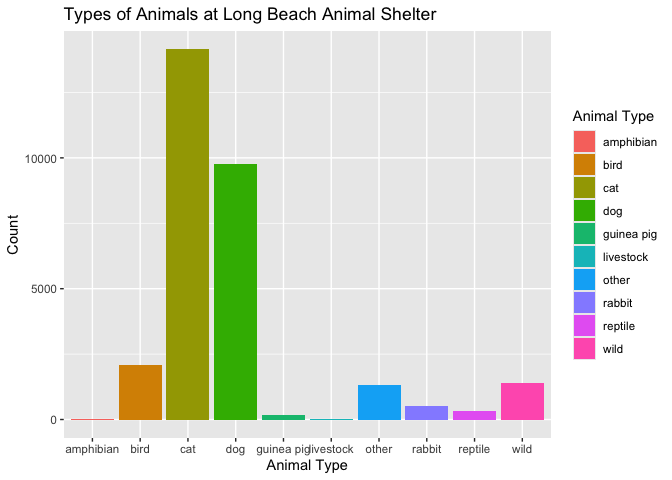

In [ ]:
#| label: animal_types

library(dplyr)

In [ ]:
#| label: animal_names

library(dplyr)
library(tidyverse)
library(shiny)
library(wordcloud2)

name_counts <- longbeach |>
  mutate(animal_name = str_remove(animal_name, "^\\*")) |>
  filter(!is.na(animal_name)) |>
  filter(animal_name != "*") |>
  group_by(animal_name) |>
  summarize(n = n()) |>
  arrange(desc(n))

ui <- fluidPage(
  titlePanel("Animal Names"),
  wordcloud2Output("wordcloud")
)

server <- function(input, output) {
  output$wordcloud <- renderWordcloud2({
    wordcloud2(name_counts)
  })
}

shinyApp(ui, server)